<a href="https://colab.research.google.com/github/devesh8423/Complete_DeepLearning/blob/main/ANN_Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# !pip install tensorflow

In [64]:
print("Hello")

Hello


In [65]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten




In [66]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [67]:
x_test.shape  # 28X28 ki pickcels hai

(10000, 28, 28)

In [68]:
y_test.shape

(10000,)

In [69]:
x_train.shape

(60000, 28, 28)

In [70]:
y_train.shape

(60000,)

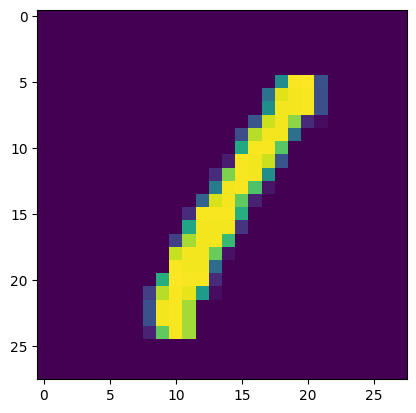

In [71]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3]);

In [72]:
x_train=x_train/255
x_test=x_test/255


In [73]:
len(set(y_train))

10

In [74]:
model=Sequential()
model.add(Flatten(input_shape=(28,28))) # flatten use for converthe dimention into 1 dimention
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))  # here we use 10 beacuse of there is the function used if softmax not sigmoid ..

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [75]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) # when in our data many 0 we use sparse that means khaali

In [77]:
history=model.fit(x_train,y_train,epochs=30,validation_split=0.2) # Trining data mese 20%data mera test hoga turant

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8562 - loss: 0.4874 - val_accuracy: 0.9596 - val_loss: 0.1421
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9608 - loss: 0.1286 - val_accuracy: 0.9631 - val_loss: 0.1195
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9748 - loss: 0.0839 - val_accuracy: 0.9693 - val_loss: 0.0993
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9791 - loss: 0.0647 - val_accuracy: 0.9697 - val_loss: 0.1068
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9844 - loss: 0.0487 - val_accuracy: 0.9710 - val_loss: 0.1008
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9882 - loss: 0.0373 - val_accuracy: 0.9737 - val_loss: 0.0986
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9914 - loss: 0.0292 - val_accuracy: 0.9701 - val_loss: 0.1191
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9921 - loss: 0.0240 -

In [92]:
y_prob_test=model.predict(x_test)
y_prob_train=model.predict(x_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [93]:
y_prob_test[0]

array([1.5435312e-18, 4.9482740e-19, 9.0853912e-17, 3.8862656e-11,
       3.8927586e-25, 2.0412527e-19, 3.2454949e-32, 9.9999994e-01,
       3.3964210e-20, 3.9465864e-10], dtype=float32)

In [119]:
y_pred_test=y_prob_test.argmax(axis=1) # Maximum probability of that column,yha pr hum ek maximum value choose krenge fir accuracy check krenge

In [120]:
y_pred_train=y_prob_train.argmax(axis=1) # Maximum probability of that column,yha pr hum ek maximum value choose krenge fir accuracy check krenge

In [121]:
y_pred_test.shape

(10000,)

In [122]:
y_pred_train.shape

(60000,)

In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_test)

0.9762

In [98]:
import numpy as np
# y_prob_train=np.where(y_prob_train>0.5,1,0)

In [125]:
y_pred_train

array([5, 0, 4, ..., 5, 6, 8])

In [100]:
import matplotlib.pyplot as plt

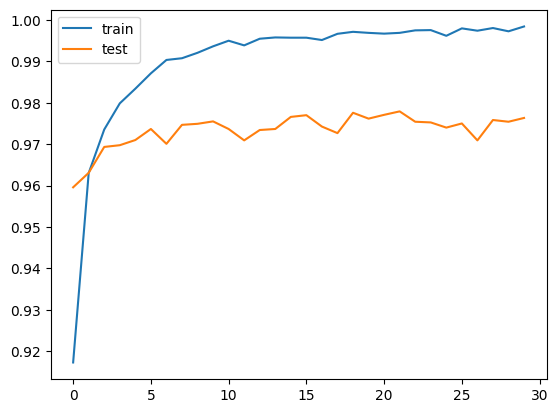

In [126]:
plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["val_accuracy"],label="test")
plt.legend();

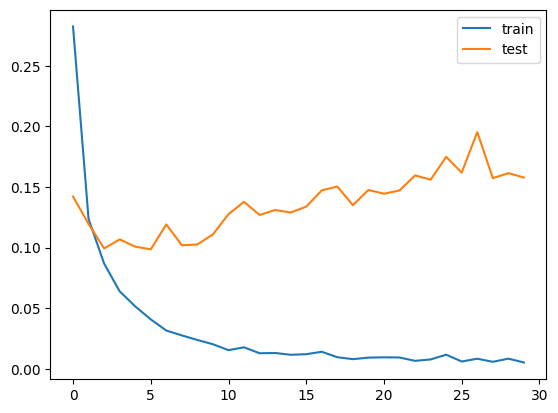

In [127]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="test")
plt.legend();

In [128]:
model.predict(x_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([2])

In [129]:
accuracy_score(y_train,y_pred_train)

0.9944666666666667

In [130]:
y_prob_train=np.where(y_prob_train>0.5,1,0)

In [131]:
accuracy_score(y_test,y_pred_test)

0.9762

In [107]:
y_train.shape

(60000,)